In [1]:
# ===================================================================
# 共通セットアップセル (ローカル / Colab 共通)
# ===================================================================
import sys
import os
from pathlib import Path

# --- 1. 環境判別 ---
IN_COLAB = False
try:
    # Colab環境でのみインポートが成功する
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    pass # ローカル環境


if IN_COLAB:
    # ==================================
    # Colab 環境でのセットアップ
    # ==================================
    print("環境: Colab を検出。セットアップを開始します。")

    # 1. Google Driveのマウント
    drive.mount('/content/drive')

    # 2. GitHubリポジトリのクローンまたはプル
    repo_path = Path('/content/braidyn-bc')
    if repo_path.exists():
        print("リポジトリを pull します...")
        os.chdir(repo_path)
        !git pull
    else:
        print("リポジトリを clone します...")
        !git clone https://github.com/nyaamikeneko/braidyn-bc.git
        os.chdir(repo_path)

    # 3. 依存ライブラリのインストール
    print("依存ライブラリをインストールします...")
    !pip install -q pynwb git+https://github.com/BraiDyn-BC/bdbc-nwb-explorer.git

    # 4. sys.path の設定
    project_root = repo_path
    if str(project_root) not in sys.path:
        sys.path.append(str(project_root))

    print(f"セットアップ完了。プロジェクトルート: {project_root}")

else:
    # ==================================
    # ローカル (VSCode) 環境でのセットアップ
    # ==================================
    print("環境: ローカル (VSCode) を検出。")

    # 1. sys.path の設定
    current_dir = Path.cwd()
    if current_dir.name == 'notebooks':
        # ノートブックが notebooks/ から実行された場合
        project_root = current_dir.parent
    else:
        # プロジェクトルート (braidyn-bc/) から実行されたと仮定
        project_root = current_dir

    if str(project_root) not in sys.path:
        sys.path.append(str(project_root))

    print(f"プロジェクトルート: {project_root}")

# ===================================================================
# 共通インポート・処理
# (セットアップが完了したため、config.py や src/ が読み込める)
# ===================================================================
print("\n共通モジュールをインポートします...")

import bdbc_nwb_explorer as nwbx
import src.data_loader as dl
import config  # config.py もここで読み込める

print(f"データパス (DATA_NWB_ROOT): {config.DATA_NWB_ROOT}")

環境: Colab を検出。セットアップを開始します。
Mounted at /content/drive
リポジトリを clone します...
Cloning into 'braidyn-bc'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 101 (delta 33), reused 16 (delta 8), pack-reused 42 (from 1)
Receiving objects: 100% (101/101), 28.62 MiB | 30.18 MiB/s, done.
Resolving deltas: 100% (54/54), done.
依存ライブラリをインストールします...
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.5/339.5 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 45.2 MB/s eta 0:00:00
セットアップ完了。プロジェクトルート: /content/braidyn-bc

共通モジュールをインポートします...
環境: Colab
データパス (DATA_NWB_ROOT): /content/drive

In [2]:
# --- 必要なデータを関数で読み出す ---
SESSION_ID = "VG1GC-66"
NWB_FILENAME = "VG1GC-66_2023-09-08_task-day15.nwb"
TASK_DAY_DIR = "task-day15"

# NWBデータの読み込み
# (dl は共通セルでインポート済み)
session = dl.load_nwb_session(SESSION_ID, NWB_FILENAME)

# CSVデータの読み込み
trials = dl.load_trials_csv(SESSION_ID, TASK_DAY_DIR)


NWB読み込み中: /content/drive/MyDrive/braidyn-bc/data/VG1GC-66/VG1GC-66_2023-09-08_task-day15.nwb
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day15/trials_L1L2.csv
全試行数: 54000


In [4]:
session.trials.data

,start_time,stop_time,pull_onset,reaction_time,pull_duration_for_success,trial_outcome
0,14.884000,15.917200,NaN,NaN,0.2,failure
1,32.250801,32.517399,32.450802,0.2206,0.2,miss
2,41.150799,43.617401,41.417400,0.2722,0.2,success
3,47.584202,48.584202,48.517601,0.9456,0.2,miss
4,53.584202,53.950802,53.850800,0.2870,0.2,miss
...,...,...,...,...,...,...
158,1752.362427,1754.862427,1752.662354,0.3160,0.2,success
159,1759.162354,1761.795776,1759.595825,0.4436,0.2,success
160,1765.929199,1768.395752,1766.195801,0.2744,0.2,success
161,1792.162598,1792.429443,1792.395996,0.2336,0.2,miss


In [12]:
import pandas as pd

# 1. 定数・変数定義
MOUSE_ID = "VG1GC-66"
TASK_DAY_DIR = "task-day15"
THRESHOLD_UPPER = 3.0

# 2. データ読み込み（前提条件の関数を使用）
# 実行環境で dl.load_trials_csv が定義されている必要があります。
df = dl.load_trials_csv(MOUSE_ID, TASK_DAY_DIR)

# 3. データ処理・クリーニングロジック
# first_diff の処理: 数値化 (文字列・空文字を NaN に) と NaN 除外
df['first_diff_numeric'] = pd.to_numeric(df['first_diff'], errors='coerce')
df_clean = df.dropna(subset=['first_diff_numeric'])

# 共通フィルタリング: first_diff が THRESHOLD_UPPER (3.0) 未満のデータのみを抽出
df_filtered = df_clean[df_clean['first_diff_numeric'] < THRESHOLD_UPPER]

# 4. 結果の出力
# first_diff の値を一覧で見るため、処理後のカラムのみを選択
result_table = df_filtered[['first_diff_numeric']].rename(
    columns={'first_diff_numeric': 'first_diff (filtered)'}
)

# 結果の表示とCSVファイルへの書き出し
print(f"--- MOUSE_ID: {MOUSE_ID}, TASK_DAY: {TASK_DAY_DIR} の first_diff 一覧 ---")
# result_table の内容がここに表示されます。
print(result_table.to_markdown(index=False, numalign="left", stralign="left"))

CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day15/trials_L1L2.csv
全試行数: 54000
--- MOUSE_ID: VG1GC-66, TASK_DAY: task-day15 の first_diff 一覧 ---
| first_diff (filtered)   |
|:------------------------|
| 0                       |
| 0.0331993               |
| 0.799999                |
| 0.0666008               |
| 0.0667992               |
| 0.566795                |
| 0                       |
| 0                       |
| 1.2                     |
| 0                       |
| 0.133202                |
| 0.800003                |
| 0.0334015               |
| 0.933395                |
| 0.466797                |
| 0                       |
| 0.0334015               |
| 2.2                     |
| 0                       |
| 0                       |
| 0                       |
| 0                       |
| 2.0666                  |
| 1.7666                  |
| 0                       |
| 0                       |
| 0.0334167               |
| 0                       |

--- 集計結果 (Threshold >= 0.04) ---
1. 音あり・成功 (Green)   : 63
2. 音あり・失敗 (Magenta) : 57
   -> 音あり合計 (1+2)    : 120
3. 元データ (State 1,2)   : 115
音なし試行数     (No Sound)     : 455
------------------------------
判定: mismatch (差分: -5)
※差分が正の場合、計算時刻が成功試行と完全一致しなかったデータがまだ存在するか、
  successラベルがついているがState1,2条件(閾値等)から漏れている可能性があります。


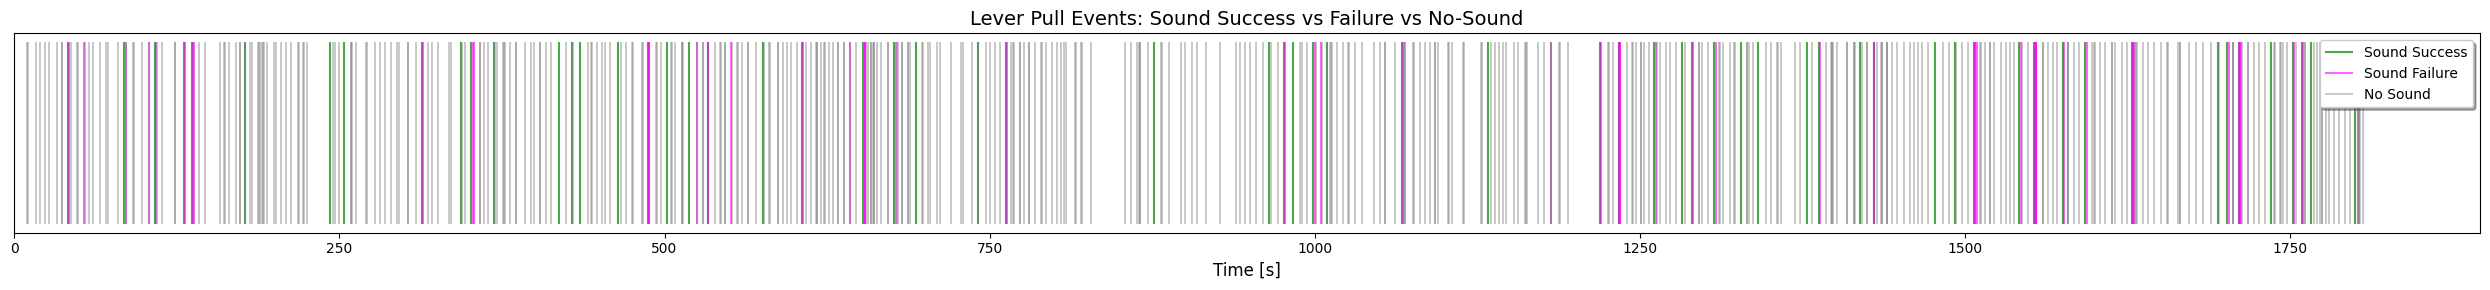

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 設定: 色と閾値 ---
COLOR_SUCCESS = 'green'      # 音あり成功
COLOR_FAILURE = 'magenta'    # 音あり失敗
COLOR_NOSOUND = 'gray'       # 音なし
THRESHOLD_DIFF = 0.04        # フィルタ用閾値（必要に応じて0に変更可能）

# --- 1. データの抽出と分類 ---

# (A) 音あり成功試行 (Sound Success)
# 条件: trial_outcome が success
# ※念のため state_task が 1,2 のものに限定する場合もありますが、
#   successは定義上 音あり試行 と仮定して抽出します。
success_trials = trials[trials['trial_outcome'] == 'success'].copy()

# 比較用に時刻を丸めてセット化 (小数点4桁)
success_start_times = (success_trials['pull_onset']).round(4)
success_times_set = set(success_start_times)

# (B) 音あり失敗試行 (Sound Failure) の算出
# 手順1: state_task 1 または 2 の全データを抽出
#       (閾値フィルタが必要ない場合は THRESHOLD_DIFF を 0 にしてください)
candidate_mask = (trials['state_task'].isin([1, 2])) & (trials['diff_value'] >= THRESHOLD_DIFF)
candidates = trials[candidate_mask].copy()

# 手順2: 開始時刻を逆算 (t - diff_value) し、同じく丸める
candidates['calc_start_time'] = (candidates['t'] - candidates['diff_value']).round(4)

# 手順3: 「成功試行の時刻セット」に含まれないものを失敗とみなす
# (~ は否定の意味。isinに含まれていない行を抽出)
failure_trials = candidates[~candidates['calc_start_time'].isin(success_times_set)]

# プロット用データ
times_success = success_trials['pull_onset']
times_failure = failure_trials['calc_start_time'] # 計算済みの時刻を使用

# (C) 音なし試行 (No Sound)
filtered_nosound = trials[(trials['state_lever'] == 1) &
                          (trials['state_task'] == 0) &
                          (trials['diff_value'] > THRESHOLD_DIFF)].copy()
# 音なしも開始時刻を逆算
filtered_nosound['lever_time_nocue'] = filtered_nosound['t'] - filtered_nosound['diff_value']
times_nosound = filtered_nosound['lever_time_nocue']

# --- 2. 数値の整合性確認 (デバッグ) ---
count_success = len(times_success)
count_failure = len(times_failure)
total_sound_processed = count_success + count_failure
raw_state_12_count = len(candidates) # フィルタ条件に合うState1,2の総数

print(f"--- 集計結果 (Threshold >= {THRESHOLD_DIFF}) ---")
print(f"1. 音あり・成功 (Green)   : {count_success}")
print(f"2. 音あり・失敗 (Magenta) : {count_failure}")
print(f"   -> 音あり合計 (1+2)    : {total_sound_processed}")
print(f"3. 元データ (State 1,2)   : {raw_state_12_count}")
print(f"音なし試行数     (No Sound)     : {len(times_nosound)}")
print("-" * 30)
if total_sound_processed == raw_state_12_count:
    print("判定: OK (合計が元データ数と一致しました)")
else:
    diff = raw_state_12_count - total_sound_processed
    print(f"判定: mismatch (差分: {diff})")
    print("※差分が正の場合、計算時刻が成功試行と完全一致しなかったデータがまだ存在するか、")
    print("  successラベルがついているがState1,2条件(閾値等)から漏れている可能性があります。")

# --- 3. 可視化 (プロット) ---
plt.figure(figsize=(25, 3)) # 高さを見やすく少し拡張

# 線を描画 (alphaで透明度調整、linewidthで線の太さ調整)
# 音あり成功：緑
plt.vlines(times_success, ymin=0, ymax=1, color=COLOR_SUCCESS, alpha=0.7, linewidth=1.5, label='Sound Success')

# 音あり失敗：マゼンタ
plt.vlines(times_failure, ymin=0, ymax=1, color=COLOR_FAILURE, alpha=0.6, linewidth=1.5, label='Sound Failure')

# 音なし：グレー
plt.vlines(times_nosound, ymin=0, ymax=1, color=COLOR_NOSOUND, alpha=0.5, linewidth=1.2, label='No Sound')

# 軸とラベル
plt.xlabel('Time [s]', fontsize=12)
plt.yticks([]) # Y軸のメモリは意味がないので消す
plt.title('Lever Pull Events: Sound Success vs Failure vs No-Sound', fontsize=14)

# 凡例を枠外または見やすい位置に
plt.legend(loc='upper right', framealpha=1.0, shadow=True)
plt.xlim(left=0) # 0秒から開始
plt.tight_layout()
plt.show()

In [54]:
import pandas as pd

# --- 前処理: first_diff の数値化 ---
# 文字列や空文字が含まれている可能性があるため、強制的に数値化し、無効な値はNaNにします
trials['first_diff_numeric'] = pd.to_numeric(trials['first_diff'], errors='coerce')

# -------------------------------------------------------
# グループA: State 1,2 かつ diff_value が存在する試行
# -------------------------------------------------------
# 条件: state_task が 1 または 2
mask_state = trials['state_task'].isin([1, 2])
# 条件: diff_value が NaN でない（存在する）
mask_diff = trials['diff_value'].notna()

group_a = trials[mask_state & mask_diff].copy()

# 時間の算出: t - diff_value
# 比較のため小数点以下4桁で丸める
group_a['calc_time_rounded'] = (group_a['t'] - group_a['diff_value']).round(4)
set_a_times = set(group_a['calc_time_rounded'])

# -------------------------------------------------------
# グループB: first_diff が NA でない試行の onset
# -------------------------------------------------------
# 条件: 先ほど数値化した first_diff_numeric が NaN でない
mask_first_diff = trials['first_diff_numeric'].notna()

group_b = trials[mask_first_diff].copy()

# pull_onset を取得し、同様に丸める
group_b['onset_rounded'] = group_b['pull_onset'].round(4)
set_b_times = set(group_b['onset_rounded'])

# -------------------------------------------------------
# 比較・集計
# -------------------------------------------------------
# 両方に共通する時間（一致した数）
intersection = set_a_times.intersection(set_b_times)

# グループAにのみ存在する時間（first_diffが無い、またはonsetがズレている）
only_in_a = set_a_times - set_b_times

# グループBにのみ存在する時間（State 0等、または計算値と合わない）
only_in_b = set_b_times - set_a_times

# -------------------------------------------------------
# 結果の出力
# -------------------------------------------------------
print("--- 時間データ照合結果 (小数点以下4桁丸め) ---")
print(f"A: State 1,2 (計算値: t - diff) のユニーク数 : {len(set_a_times)}")
print(f"B: first_diff 有効 (記録値: onset) のユニーク数 : {len(set_b_times)}")
print("-" * 40)
print(f"一致した数 (A AND B)                        : {len(intersection)}")
print(f"不一致: Aのみ (first_diff無し/ズレ)         : {len(only_in_a)}")
print(f"不一致: Bのみ (State違い/ズレ)              : {len(only_in_b)}")

# 一致率の確認
if len(set_a_times) > 0:
    match_rate = (len(intersection) / len(set_a_times)) * 100
    print(f"State 1,2 データに対する一致率              : {match_rate:.1f}%")

--- 時間データ照合結果 (小数点以下4桁丸め) ---
A: State 1,2 (計算値: t - diff) のユニーク数 : 171
B: first_diff 有効 (記録値: onset) のユニーク数 : 163
----------------------------------------
一致した数 (A AND B)                        : 101
不一致: Aのみ (first_diff無し/ズレ)         : 70
不一致: Bのみ (State違い/ズレ)              : 62
State 1,2 データに対する一致率              : 59.1%


In [56]:
set_a_times

{32.4508,
 41.4174,
 42.3174,
 43.4508,
 53.8508,
 70.551,
 84.1178,
 85.6512,
 103.3846,
 107.9846,
 109.218,
 119.618,
 130.218,
 131.218,
 136.4514,
 137.0182,
 138.0514,
 138.2182,
 153.3516,
 157.7182,
 217.5854,
 242.9522,
 253.8856,
 294.2858,
 313.8194,
 314.186,
 325.6194,
 343.3196,
 344.1862,
 351.553,
 352.353,
 353.4862,
 357.8862,
 368.753,
 397.0198,
 418.4868,
 428.8534,
 434.6534,
 463.887,
 470.187,
 487.6538,
 488.1872,
 488.4206,
 489.1206,
 489.2538,
 489.3206,
 489.4206,
 502.2206,
 513.4206,
 518.6874,
 525.1208,
 533.6874,
 533.7542,
 551.321,
 575.5544,
 584.7878,
 605.6214,
 606.288,
 606.388,
 637.5216,
 642.6882,
 652.455,
 653.3884,
 653.855,
 654.255,
 654.3884,
 676.2218,
 677.8552,
 678.3884,
 687.0886,
 693.0886,
 762.489,
 763.7558,
 820.4228,
 827.3894,
 858.823,
 876.4564,
 887.6898,
 905.3234,
 964.7238,
 971.4904,
 976.4572,
 977.2572,
 983.2572,
 998.6906,
 1000.624,
 1005.1574,
 1066.8578,
 1068.2578,
 1080.6912,
 1132.9916,
 1161.2917,
 1176.258

In [57]:
set_b_times

{41.4174,
 48.5176,
 53.8508,
 66.0176,
 70.551,
 84.1178,
 103.3846,
 107.9846,
 130.218,
 513.4206,
 518.6874,
 525.1208,
 555.9544,
 642.6882,
 1541.9941,
 nan,
 nan,
 533.6874,
 575.5544,
 605.6214,
 1553.3944,
 nan,
 nan,
 32.4508,
 nan,
 119.618,
 253.8856,
 294.2858,
 551.321,
 584.7878,
 637.5216,
 762.489,
 1066.8578,
 1080.6912,
 1575.2946,
 nan,
 1132.9916,
 1592.428,
 1607.7614,
 1613.0948,
 nan,
 1628.9282,
 nan,
 1645.595,
 1650.6284,
 1655.6949,
 nan,
 136.4514,
 153.3516,
 157.7182,
 177.5518,
 217.5854,
 242.9522,
 652.455,
 676.2218,
 687.0886,
 693.0886,
 1161.2917,
 1176.2585,
 1181.6918,
 1219.5922,
 1234.0256,
 1260.9924,
 1677.4286,
 nan,
 1694.4286,
 nan,
 1701.5955,
 nan,
 nan,
 nan,
 nan,
 1710.5288,
 nan,
 nan,
 nan,
 741.0888,
 1215.1588,
 1239.9922,
 1735.6956,
 1752.6624,
 1759.5958,
 nan,
 nan,
 1766.1958,
 nan,
 1282.1926,
 1290.2592,
 1307.126,
 1792.396,
 1800.4626,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 313.8194,
 325.6194,
 343.3196,
